In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('./fp-historical-wildfire-data-2006-2021.csv')

In [4]:
df.shape

(22914, 50)

<Axes: >

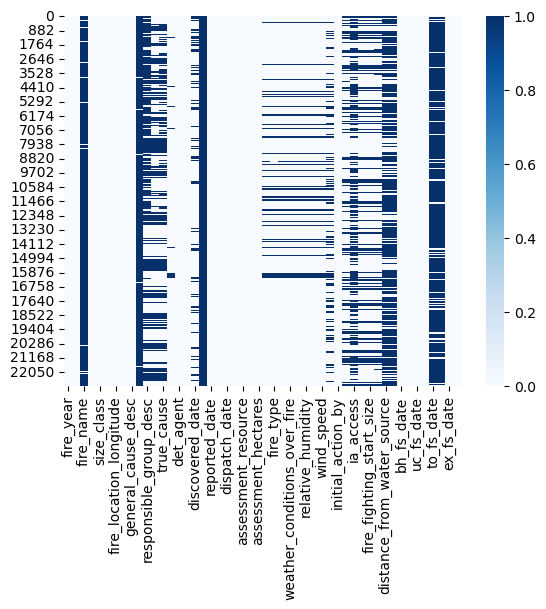

In [5]:
import seaborn as sns
sns.heatmap(df.isna(), cmap='Blues')

In [6]:
nulls = df.isna().sum()
nulls[nulls > 10000].sort_values(ascending=False)

discovered_size               22914
industry_identifier_desc      22506
fire_name                     22310
to_fs_date                    20470
to_hectares                   20470
distance_from_water_source    16549
first_bucket_drop_date        16549
responsible_group_desc        13883
ia_access                     12838
true_cause                    10426
dtype: int64

In [11]:
df.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,NaN,2021-06-28 22:26,0.01,2021-07-01 13:26,10.00,NaN,NaN,2021-07-01 13:44,5.50
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,NaN,2021-03-30 14:30,0.01,2021-03-30 14:30,0.01,2021-03-30 14:35,0.01,2021-04-09 8:30,0.01
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,NaN,2021-04-16 16:57,0.10,2021-04-16 16:57,0.10,NaN,NaN,2021-04-17 14:15,0.10
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,NaN,2021-04-17 15:20,0.01,2021-04-17 15:20,0.01,NaN,NaN,2021-04-17 15:24,0.01
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,NaN,2021-04-01 19:10,7.13,2021-04-02 11:00,7.13,2021-04-02 15:52,7.13,2021-04-12 14:30,7.13


In [9]:
df['general_cause_desc'].value_counts()

general_cause_desc
Lightning               7873
Recreation              5239
Resident                3948
Incendiary              1995
Power Line Industry     1177
Undetermined             736
Agriculture Industry     497
Forest Industry          417
Oil & Gas Industry       409
Other Industry           295
Railroad                 126
Government               116
Restart                   65
Prescribed Fire           19
Under Investigation        2
Name: count, dtype: int64

In [11]:
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px


In [12]:
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.fire_location_longitude, df.fire_location_latitude))

In [13]:
df_geo.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares,geometry
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,2021-06-28 22:26,0.01,2021-07-01 13:26,10.00,NaN,NaN,2021-07-01 13:44,5.50,POINT (-119.92697 59.52214)
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,2021-03-30 14:30,0.01,2021-03-30 14:30,0.01,2021-03-30 14:35,0.01,2021-04-09 8:30,0.01,POINT (-116.11896 52.69226)
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,2021-04-16 16:57,0.10,2021-04-16 16:57,0.10,NaN,NaN,2021-04-17 14:15,0.10,POINT (-110.71995 55.93705)
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,2021-04-17 15:20,0.01,2021-04-17 15:20,0.01,NaN,NaN,2021-04-17 15:24,0.01,POINT (-111.16075 56.42593)
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,2021-04-01 19:10,7.13,2021-04-02 11:00,7.13,2021-04-02 15:52,7.13,2021-04-12 14:30,7.13,POINT (-116.05863 53.69345)


In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [18]:
print(world)

       pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    M

/Users/moazmahran/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

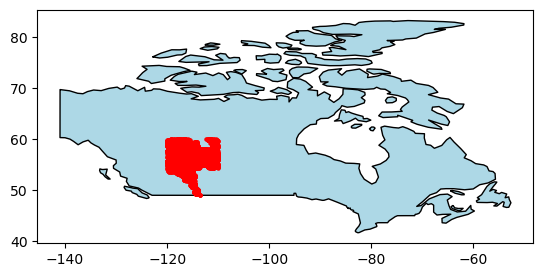

In [20]:
axis = world[world.name == 'Canada'].plot(color='lightblue', edgecolor='black')
df_geo.plot(ax=axis, color='red', markersize=5)

In [101]:
df.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,NaN,2021-06-28 22:26,0.01,2021-07-01 13:26,10.00,NaN,NaN,2021-07-01 13:44,5.50
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,NaN,2021-03-30 14:30,0.01,2021-03-30 14:30,0.01,2021-03-30 14:35,0.01,2021-04-09 8:30,0.01
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,NaN,2021-04-16 16:57,0.10,2021-04-16 16:57,0.10,NaN,NaN,2021-04-17 14:15,0.10
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,NaN,2021-04-17 15:20,0.01,2021-04-17 15:20,0.01,NaN,NaN,2021-04-17 15:24,0.01
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,NaN,2021-04-01 19:10,7.13,2021-04-02 11:00,7.13,2021-04-02 15:52,7.13,2021-04-12 14:30,7.13


In [102]:
locationMap = {'C': 'Calgary', 
               'E': 'Edson', 
               'H': 'High Level', 
                'G': 'Grande Prairie',
                'L': 'Lac La Biche',
                'M': 'Fort McMurray',
                'P': 'Peace River',
                'R': 'Rocky',
                'S': 'Slave Lke',
                'W': 'Whitecourt' 
}
df['forest_area'] = df['fire_number'].str[0].map(locationMap)
df['forest_area']

0           High Level
1                Rocky
2         Lac La Biche
3        Fort McMurray
4                Edson
             ...      
22909          Calgary
22910          Calgary
22911          Calgary
22912          Calgary
22913    Fort McMurray
Name: forest_area, Length: 22914, dtype: object

In [103]:
df.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares,forest_area
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,2021-06-28 22:26,0.01,2021-07-01 13:26,10.00,NaN,NaN,2021-07-01 13:44,5.50,High Level
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,2021-03-30 14:30,0.01,2021-03-30 14:30,0.01,2021-03-30 14:35,0.01,2021-04-09 8:30,0.01,Rocky
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,2021-04-16 16:57,0.10,2021-04-16 16:57,0.10,NaN,NaN,2021-04-17 14:15,0.10,Lac La Biche
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,2021-04-17 15:20,0.01,2021-04-17 15:20,0.01,NaN,NaN,2021-04-17 15:24,0.01,Fort McMurray
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,2021-04-01 19:10,7.13,2021-04-02 11:00,7.13,2021-04-02 15:52,7.13,2021-04-12 14:30,7.13,Edson


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'High Level'),
  Text(1, 0, 'Rocky'),
  Text(2, 0, 'Lac La Biche'),
  Text(3, 0, 'Fort McMurray'),
  Text(4, 0, 'Edson'),
  Text(5, 0, 'Grande Prairie'),
  Text(6, 0, 'Whitecourt'),
  Text(7, 0, 'Peace River'),
  Text(8, 0, 'Calgary'),
  Text(9, 0, 'Slave Lke')])

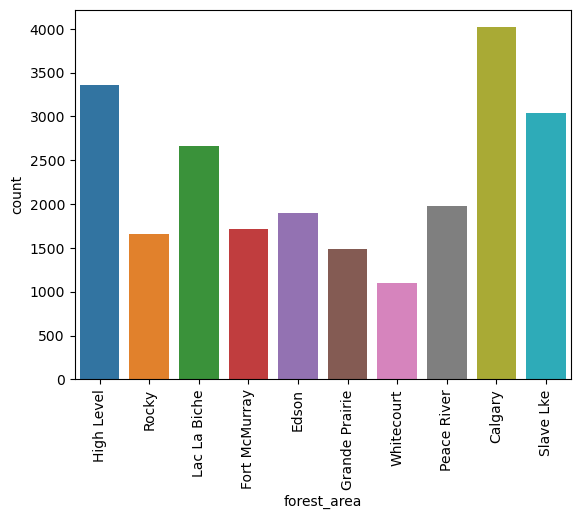

In [110]:
sns.countplot(data=df, x='forest_area')
plt.xticks(rotation=90)

In [112]:
#most common cause of fire for every forest area
df.groupby('forest_area')['general_cause_desc'].value_counts().groupby(level=0).nlargest(1).sort_values(ascending=False)

forest_area     forest_area     general_cause_desc
Calgary         Calgary         Recreation            3211
High Level      High Level      Lightning             1535
Slave Lke       Slave Lke       Lightning             1512
Fort McMurray   Fort McMurray   Lightning             1289
Peace River     Peace River     Lightning              934
Lac La Biche    Lac La Biche    Incendiary             754
Edson           Edson           Lightning              523
Rocky           Rocky           Recreation             484
Grande Prairie  Grande Prairie  Lightning              445
Whitecourt      Whitecourt      Lightning              384
Name: count, dtype: int64

<Axes: xlabel='forest_area,forest_area'>

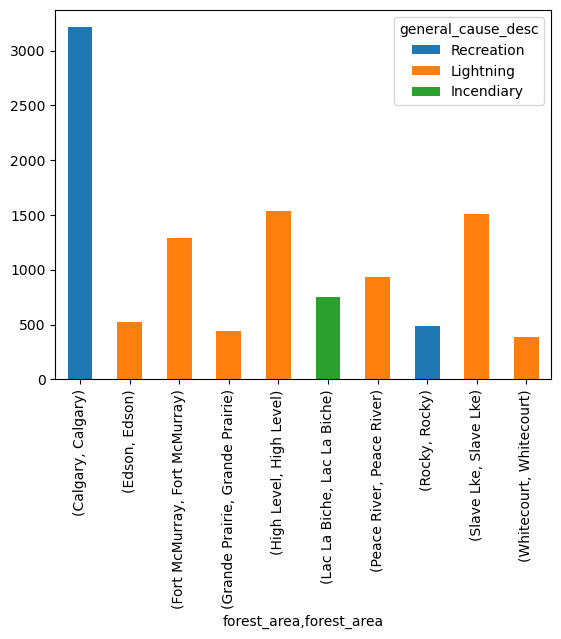

In [113]:
# bar chart for the most common cause of fire for every forest area
df.groupby('forest_area')['general_cause_desc'].value_counts().groupby(level=0).nlargest(1).sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)

/var/folders/6y/20c82qfn31q46d7hnld4t5mc0000gn/T/ipykernel_14183/2670592220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calgary['general_cause_desc'] = calgary['general_cause_desc'].apply(lambda x: x if x in calgary['general_cause_desc'].value_counts().head(3).index else 'others')


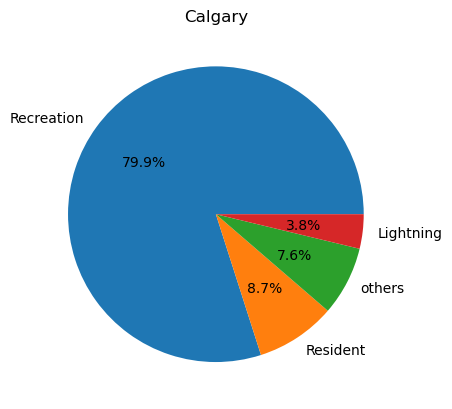

In [124]:
#pie chart for most common cause of fire in calgary with only top 3 causes show and rest as others
calgary = df[df['forest_area'] == 'Calgary']
#keep top 3 causes and replace rest with 'others'
calgary['general_cause_desc'] = calgary['general_cause_desc'].apply(lambda x: x if x in calgary['general_cause_desc'].value_counts().head(3).index else 'others')
calgary['general_cause_desc'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Calgary')
plt.ylabel('')
plt.show()




Text(0, 0.5, 'Number of fires')

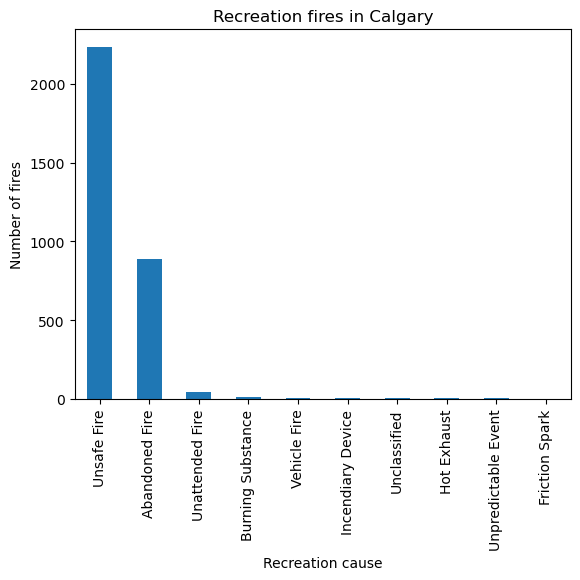

In [142]:
#every recreation fire in calgary
calgary[calgary['general_cause_desc'] == 'Recreation']['true_cause'].value_counts().plot.bar()
plt.title('Recreation fires in Calgary')
plt.xlabel('Recreation cause')
plt.ylabel('Number of fires')

In [163]:
# number of calgary fires that are recreation and caused by unsafe fires
calMainFires = calgary[(calgary['general_cause_desc'] == 'Recreation') & (calgary['true_cause'] == 'Unsafe Fire')].shape[0] + calgary[(calgary['general_cause_desc'] == 'Recreation') & (calgary['true_cause'] == 'Abandoned Fire')].shape[0]
calRecPercent = round((calMainFires/df.shape[0])*100, 2)
print(calRecPercent)

13.63


In [168]:
#fire class of calMainFires
calgary[(calgary['general_cause_desc'] == 'Recreation')]['size_class'].value_counts()

size_class
A    3170
B      30
C      10
E       1
Name: count, dtype: int64

In [172]:
#fire class of calMainFires
calgary[(calgary['general_cause_desc'] == 'Recreation')]['size_class'].value_counts()

size_class
A    3170
B      30
C      10
E       1
Name: count, dtype: int64

In [173]:
df['size_class'].value_counts()

size_class
A    15402
B     5825
C     1060
E      325
D      302
Name: count, dtype: int64

In [179]:
calgary = df[df['forest_area'] == 'Calgary']

In [175]:
calgary.head(
)

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares,forest_area
13,2021,CWF171,NaN,0.10,A,51.154717,-114.776742,Indian Reservation,Power Line Industry,NaN,...,NaN,2021-12-01 13:10,0.10,2021-12-01 13:10,0.10,NaN,NaN,2021-12-01 13:33,0.10,Calgary
15,2021,CWF001,NaN,0.01,A,49.410191,-114.318843,Provincial Park,Power Line Industry,NaN,...,NaN,2021-01-13 13:25,0.01,2021-01-13 13:25,0.01,NaN,NaN,2021-01-13 13:35,0.01,Calgary
22,2021,CWF002,NaN,0.01,A,49.587753,-114.378655,Provincial Land,Recreation,NaN,...,NaN,2021-01-29 10:45,0.01,2021-01-29 10:45,0.01,NaN,NaN,2021-01-29 13:15,0.01,Calgary
36,2021,CWF003,NaN,0.05,A,51.119500,-114.778950,Provincial Land,Resident,NaN,...,NaN,2021-02-23 10:42,0.05,2021-02-23 10:42,0.05,NaN,NaN,2021-02-23 10:52,0.05,Calgary
50,2021,CWF004,NaN,0.15,B,51.271888,-115.025818,Provincial Land,Incendiary,NaN,...,NaN,2021-03-14 19:00,0.15,2021-03-14 19:00,0.15,NaN,NaN,2021-03-15 11:05,0.15,Calgary


In [195]:
calgaryLarge = calgary[(calgary['size_class'] != 'A') & (calgary['size_class'] != 'B')]

/var/folders/6y/20c82qfn31q46d7hnld4t5mc0000gn/T/ipykernel_14183/2714926492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calgaryLarge['general_cause_desc'] = calgaryLarge['general_cause_desc'].apply(lambda x: x if x in calgaryLarge['general_cause_desc'].value_counts().head(6).index else 'others')


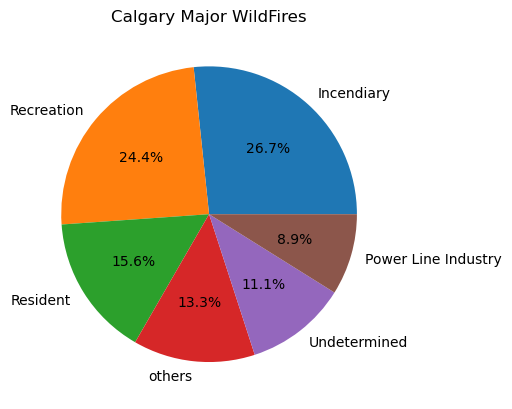

In [197]:
#keep top 3 causes and replace rest with 'others'
calgaryLarge['general_cause_desc'] = calgaryLarge['general_cause_desc'].apply(lambda x: x if x in calgaryLarge['general_cause_desc'].value_counts().head(6).index else 'others')
calgaryLarge['general_cause_desc'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Calgary Major WildFires')
plt.ylabel('')
plt.show()

In [183]:
calgaryLarge.shape[0]

45

Text(0, 0.5, 'Number of fires')

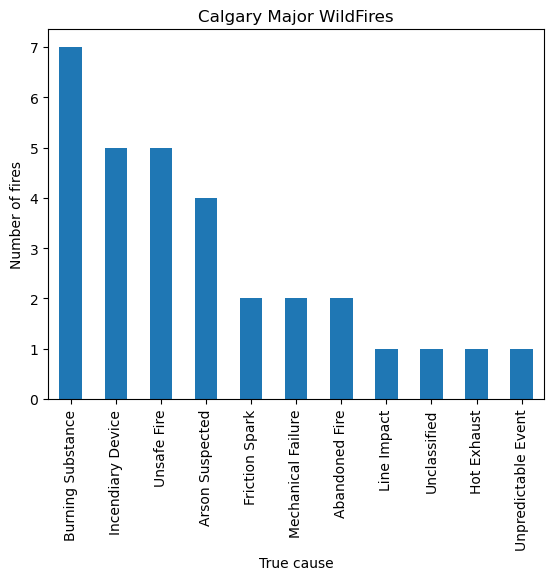

In [200]:
calgaryLarge['true_cause'].value_counts().plot.bar()
plt.title('Calgary Major WildFires')
plt.xlabel('True cause')
plt.ylabel('Number of fires')


Text(0.5, 1.0, 'Major Wildfires in different forest areas')

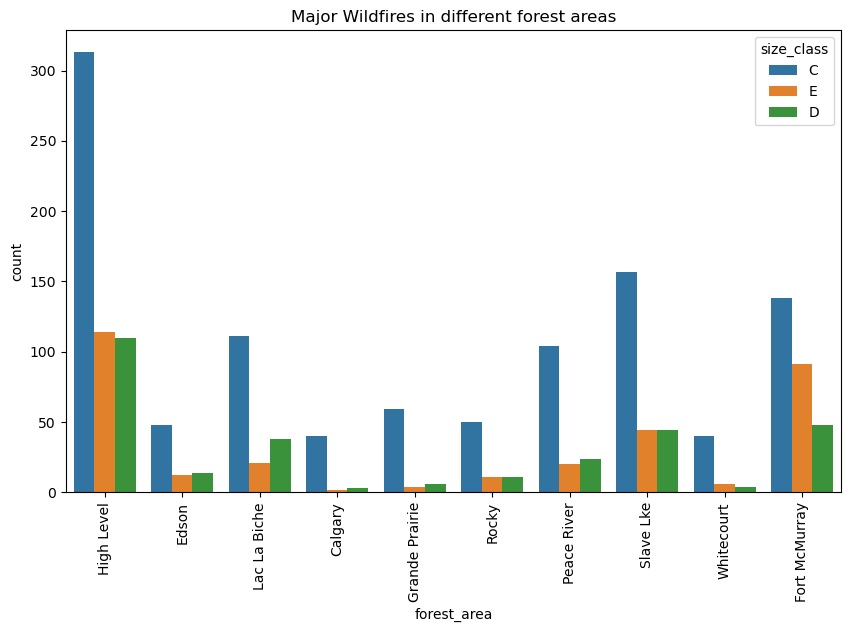

In [207]:
dfMajor = df[(df['size_class'] != 'A') & (df['size_class'] != 'B')]
# bar chart for the most common cause of fire for every forest area where each bar contains color for each size class in one bar
plt.figure(figsize=(10, 6))
sns.countplot(data=dfMajor, x='forest_area', hue='size_class')
plt.xticks(rotation=90)
plt.title('Major Wildfires in different forest areas')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'High Level'),
  Text(1, 0, 'Edson'),
  Text(2, 0, 'Lac La Biche'),
  Text(3, 0, 'Calgary'),
  Text(4, 0, 'Grande Prairie'),
  Text(5, 0, 'Rocky'),
  Text(6, 0, 'Peace River'),
  Text(7, 0, 'Slave Lke'),
  Text(8, 0, 'Whitecourt'),
  Text(9, 0, 'Fort McMurray')])

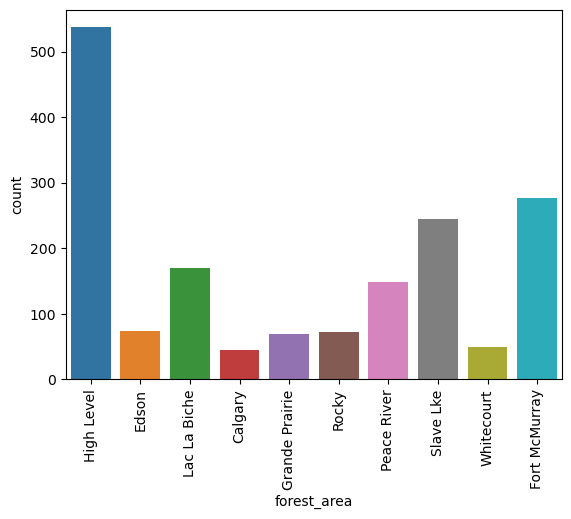

In [209]:
sns.countplot(data=dfMajor, x='forest_area')
plt.xticks(rotation=90)

/var/folders/6y/20c82qfn31q46d7hnld4t5mc0000gn/T/ipykernel_14183/2053461409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HighLevel['general_cause_desc'] = HighLevel['general_cause_desc'].apply(lambda x: x if x in HighLevel['general_cause_desc'].value_counts().head(5).index else 'others')


Text(0, 0.5, '')

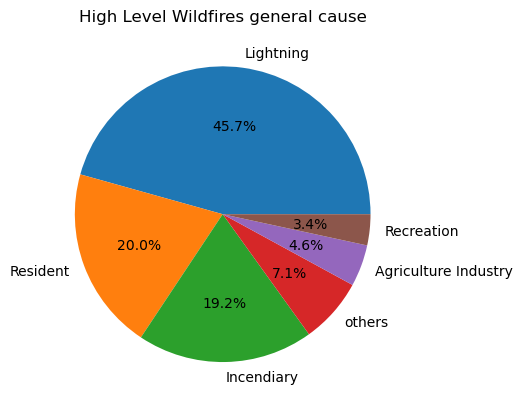

In [217]:
HighLevel = df[df['forest_area'] == 'High Level']
#keep top 3 causes and replace rest with 'others'
HighLevel['general_cause_desc'] = HighLevel['general_cause_desc'].apply(lambda x: x if x in HighLevel['general_cause_desc'].value_counts().head(5).index else 'others')
#pie chart for most common cause of fire in High Level with only top 3 causes show and rest as others
HighLevel['general_cause_desc'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('High Level Wildfires general cause')
plt.ylabel('')

In [228]:
#true cause for lightning fires in High Level
HighLevel[HighLevel['general_cause_desc'] == 'Lightning']

fire_year                       1535
fire_number                     1535
fire_name                         94
current_size                    1535
size_class                      1535
fire_location_latitude          1535
fire_location_longitude         1535
fire_origin                     1535
general_cause_desc              1535
industry_identifier_desc           0
responsible_group_desc             0
activity_class                     0
true_cause                         0
fire_start_date                 1534
det_agent                       1535
det_agent_type                  1535
discovered_date                 1485
discovered_size                    0
reported_date                   1535
dispatched_resource             1534
dispatch_date                   1534
start_for_fire_date             1534
assessment_resource             1535
assessment_datetime             1535
assessment_hectares             1535
fire_spread_rate                1535
fire_type                       1535
f

<Axes: xlabel='true_cause'>

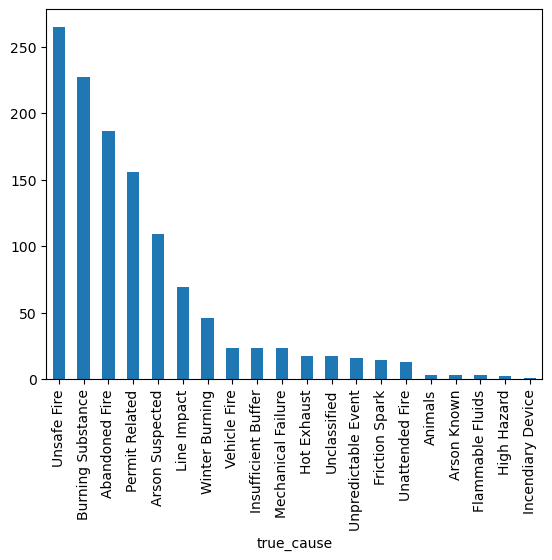

In [231]:
#causes of fire other than lightning in High Level
HighLevel[HighLevel['general_cause_desc'] != 'Lightning']['true_cause'].value_counts().plot.bar()

<Axes: xlabel='activity_class'>

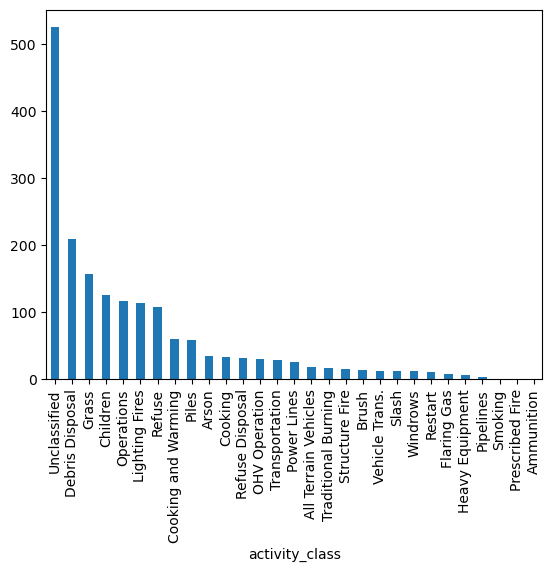

In [232]:
#causes of fire other than lightning in High Level
HighLevel[HighLevel['general_cause_desc'] != 'Lightning']['activity_class'].value_counts().plot.bar()

In [239]:
#correlation between temperature and fire size
print(HighLevel['temperature'].corr(HighLevel['uc_hectares']))
print(HighLevel['relative_humidity'].corr(HighLevel['uc_hectares']))
print(HighLevel['wind_speed'].corr(HighLevel['uc_hectares']))


0.014344390330520046
-0.0065153693656728
0.08369108982966636


In [240]:
print(dfMajor['temperature'].corr(dfMajor['uc_hectares']))
print(dfMajor['relative_humidity'].corr(dfMajor['uc_hectares']))
print(dfMajor['wind_speed'].corr(dfMajor['uc_hectares']))

0.027059227953660444
-0.037275754372001334
0.09800521163979171


<Axes: >

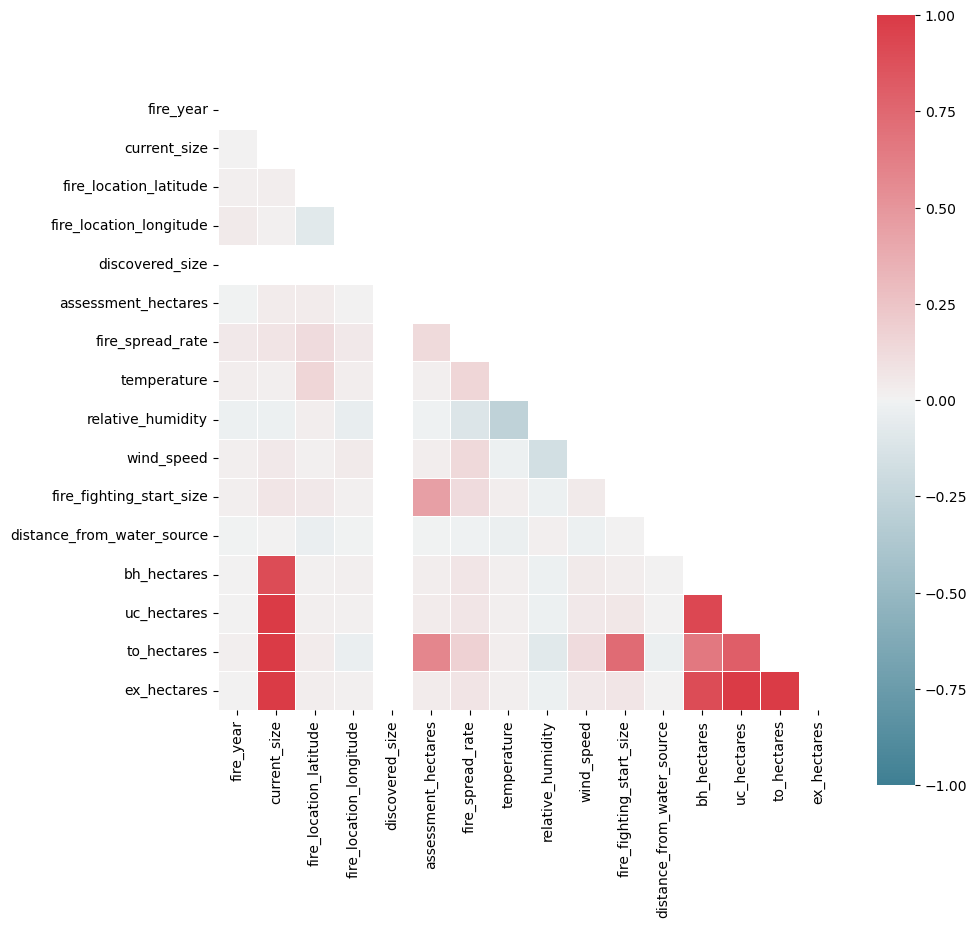

In [247]:
numerical_df = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])
corr = numerical_df.corr()

f, ax = plt.subplots(figsize=(10, 10))
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, vmin = -1.0, vmax = 1.0, linewidths=.5)

<Axes: >

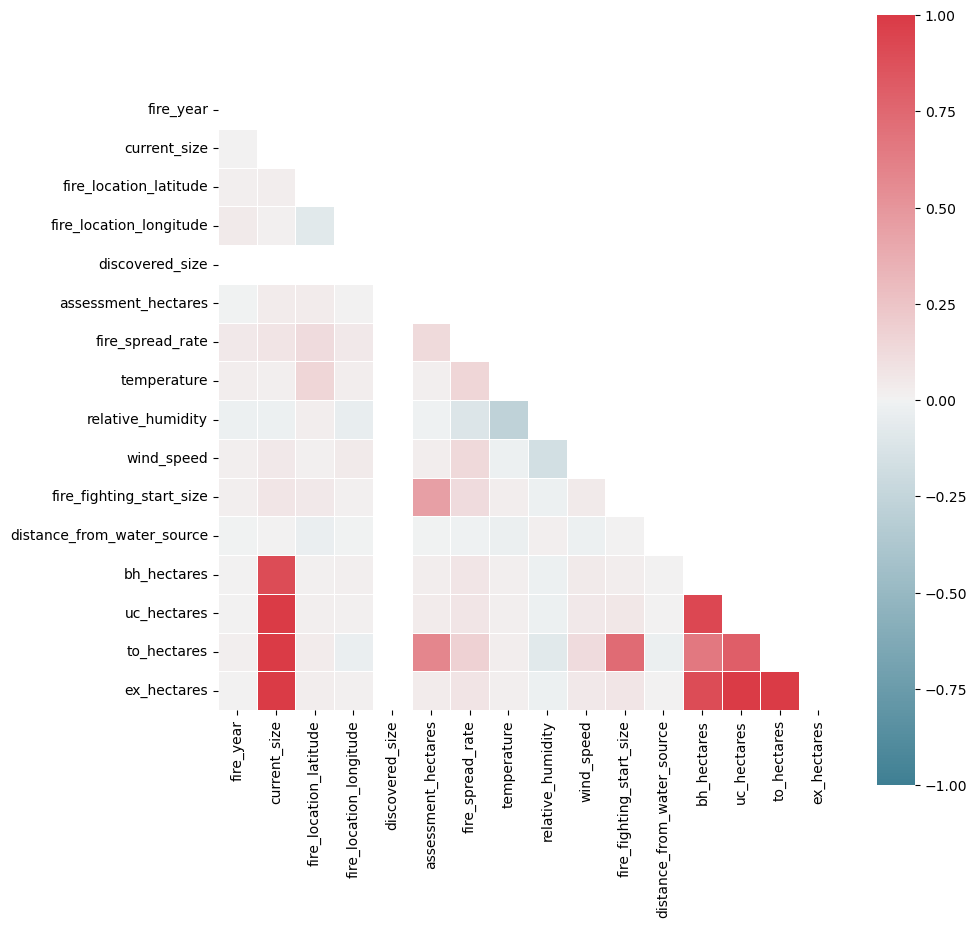

In [248]:
numericalHighLevel = HighLevel.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])
corr = numerical_df.corr()
f, ax = plt.subplots(figsize=(10, 10))
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, vmin = -1.0, vmax = 1.0, linewidths=.5)

<Axes: xlabel='size_class'>

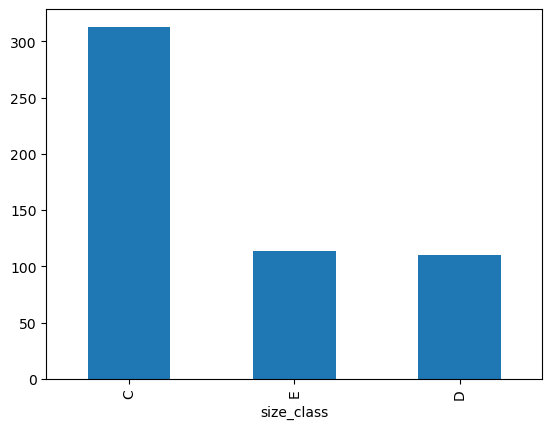

In [258]:
#high level fires only size class c, d, e

HighLevelLarge = HighLevel[(HighLevel['size_class'] != 'A') & (HighLevel['size_class'] != 'B')]
HighLevelLarge['size_class'].value_counts().plot.bar()





/var/folders/6y/20c82qfn31q46d7hnld4t5mc0000gn/T/ipykernel_14183/2976379493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HighLevelLarge['general_cause_desc'] = HighLevelLarge['general_cause_desc'].apply(lambda x: x if x in HighLevelLarge['general_cause_desc'].value_counts().head(5).index else 'others')


<Axes: ylabel='count'>

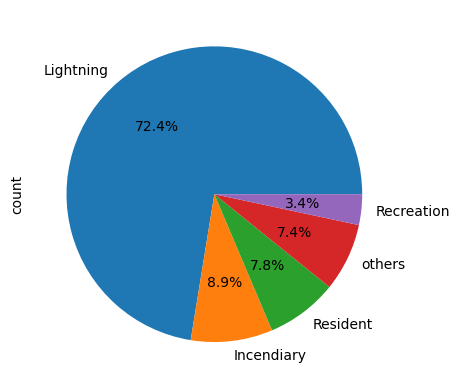

In [261]:
#pie chart for causes of fire in High Level with only top 3 causes show and rest as others
HighLevelLarge['general_cause_desc'] = HighLevelLarge['general_cause_desc'].apply(lambda x: x if x in HighLevelLarge['general_cause_desc'].value_counts().head(5).index else 'others')
HighLevelLarge['general_cause_desc'].value_counts().plot.pie(autopct='%1.1f%%')

In [265]:
McMurray = df[df['forest_area'] == 'Fort McMurray']

/var/folders/6y/20c82qfn31q46d7hnld4t5mc0000gn/T/ipykernel_14183/1140373908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  McMurray['general_cause_desc'] = McMurray['general_cause_desc'].apply(lambda x: x if x in McMurray['general_cause_desc'].value_counts().head(5).index else 'others')


Text(0, 0.5, '')

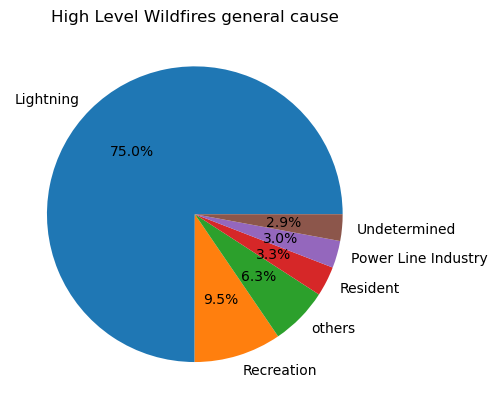

In [267]:
#keep top 5 causes and replace rest with 'others'
McMurray['general_cause_desc'] = McMurray['general_cause_desc'].apply(lambda x: x if x in McMurray['general_cause_desc'].value_counts().head(5).index else 'others')
#pie chart for most common cause of fire in High Level with only top 3 causes show and rest as others
McMurray['general_cause_desc'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('High Level Wildfires general cause')
plt.ylabel('')

In [254]:
#number of fires in size class A in Fort McMurray
McMurray[McMurray['size_class'] == 'A'].shape[0]

869

<Axes: ylabel='count'>

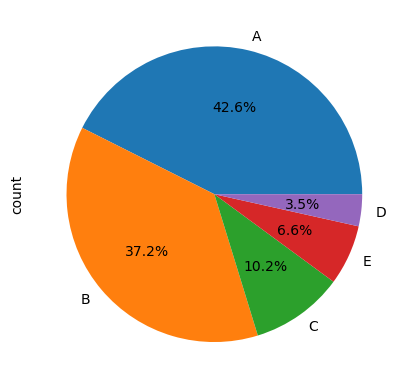

In [270]:
#pie chart number of fires caused by lightning in Fort McMurray by size class 
McMurray[McMurray['general_cause_desc'] == 'Lightning']['size_class'].value_counts().plot.pie(autopct='%1.1f%%')


<Axes: ylabel='count'>

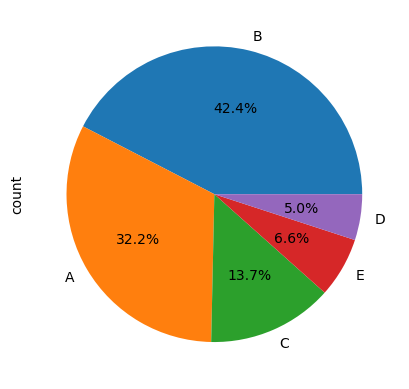

In [271]:
HighLevel[HighLevel['general_cause_desc'] == 'Lightning']['size_class'].value_counts().plot.pie(autopct='%1.1f%%')